In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("shoe_sales.csv")

In [4]:
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [6]:
df.shape

(60, 3)

In [7]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [11]:
df[df.sold_qty < 12.25].shape

(15, 3)

In [12]:
15/60

0.25

In [14]:
df[df.sold_qty < 19.75].shape

(43, 3)

In [15]:
43/60


0.7166666666666667

In [42]:
df.groupby('brand')['sold_qty'].sum()

brand
Adidas    1044.0
Nike       550.0
Name: sold_qty, dtype: float64

##  1. Nike Analysis
### Basic Descriptive Analysis

In [18]:
df_nike = df[df.brand == "Nike"]

In [19]:
df_nike.shape

(30, 3)

In [21]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [23]:
round(df_nike.sold_qty.median())

20

### look for null values

In [26]:
df_nike.isnull().head()

,date,brand,sold_qty
0,False,False,False
2,False,False,False
4,False,False,False
6,False,False,False
8,False,False,False


In [27]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


### replacing NaN value

In [30]:
val = round(df_nike.sold_qty.median())
val

20

In [31]:
df_nike.sold_qty.fillna(val, inplace = True)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_13796\3391437492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.sold_qty.fillna(val, inplace = True)


In [32]:
df_nike.loc[[32,48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


In [48]:
## how many total sold

df_nike.sold_qty.sum()

np.float64(590.0)

## 2. Adidas Analysis

In [35]:
df_A = df[df.brand == "Adidas"]
df_A.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


In [36]:
df_A.shape


(30, 3)

In [37]:
df_A.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [38]:
round(df_A.sold_qty.median())

12

In [44]:
df_A[df_A.sold_qty.isnull()]

,date,brand,sold_qty


In [49]:
df_A.sold_qty.quantile([0.95])

0.95    18.55
Name: sold_qty, dtype: float64

In [50]:
df_A[df_A.sold_qty > 18.55]

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


### detecting outleirs through plot


In [51]:
def plot_qty():
    plt.figure(figsize = (15, 6))

    dates = df_nike['date']

    plt.plot(dates, df_nike['sold_qty'], marker = 'o', label = 'Nike', color = 'blue')
    plt.plot(dates, df_A['sold_qty'], marker = 'o', label = 'Adidas', color= 'red')

    plt.xlabel('Date')
    plt.ylabel('Total qty Sold')

    plt.title('Daily sales for Nike and Adidas in September 2023')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
    plt.show()

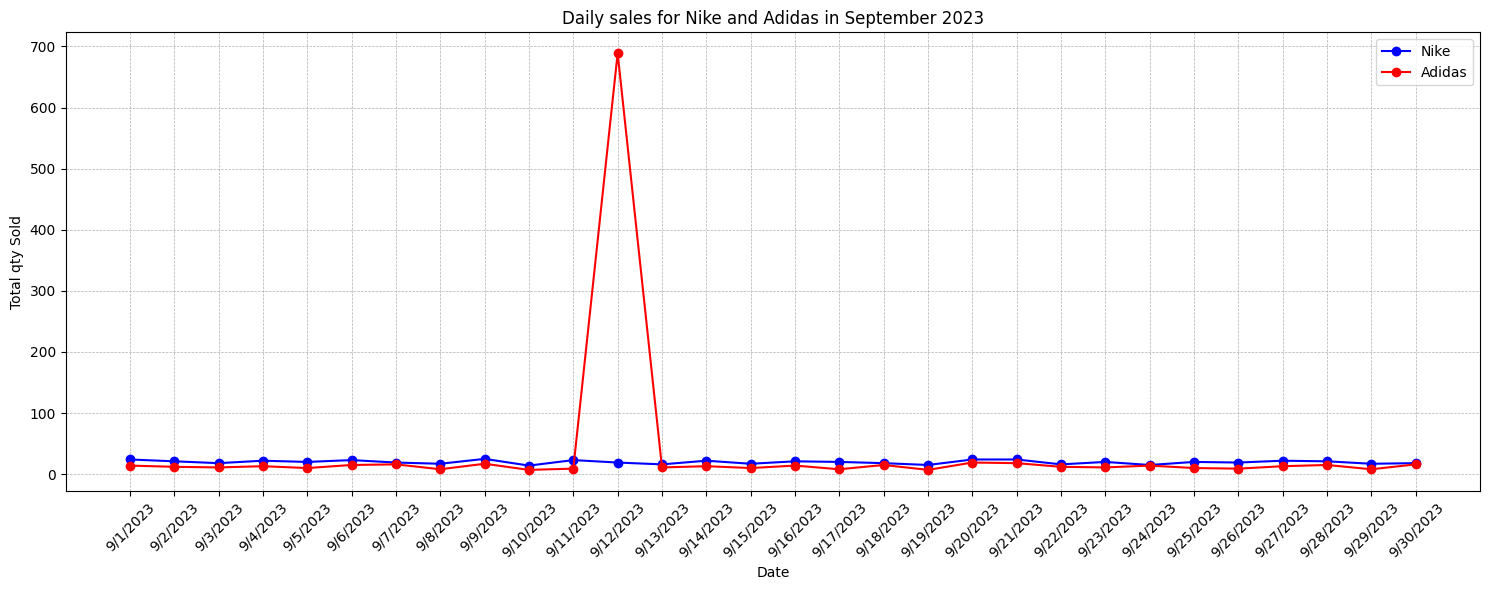

In [53]:
plot_qty()

### to fix the outlier cant use avg because it is influenced by the outlier

In [55]:
v = round(df_A.sold_qty.median())

In [56]:
v

12

In [57]:
df_A.sold_qty.replace(689, v, inplace=True)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_13796\4087586047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A.sold_qty.replace(689, v, inplace=True)


### after removing the outlier

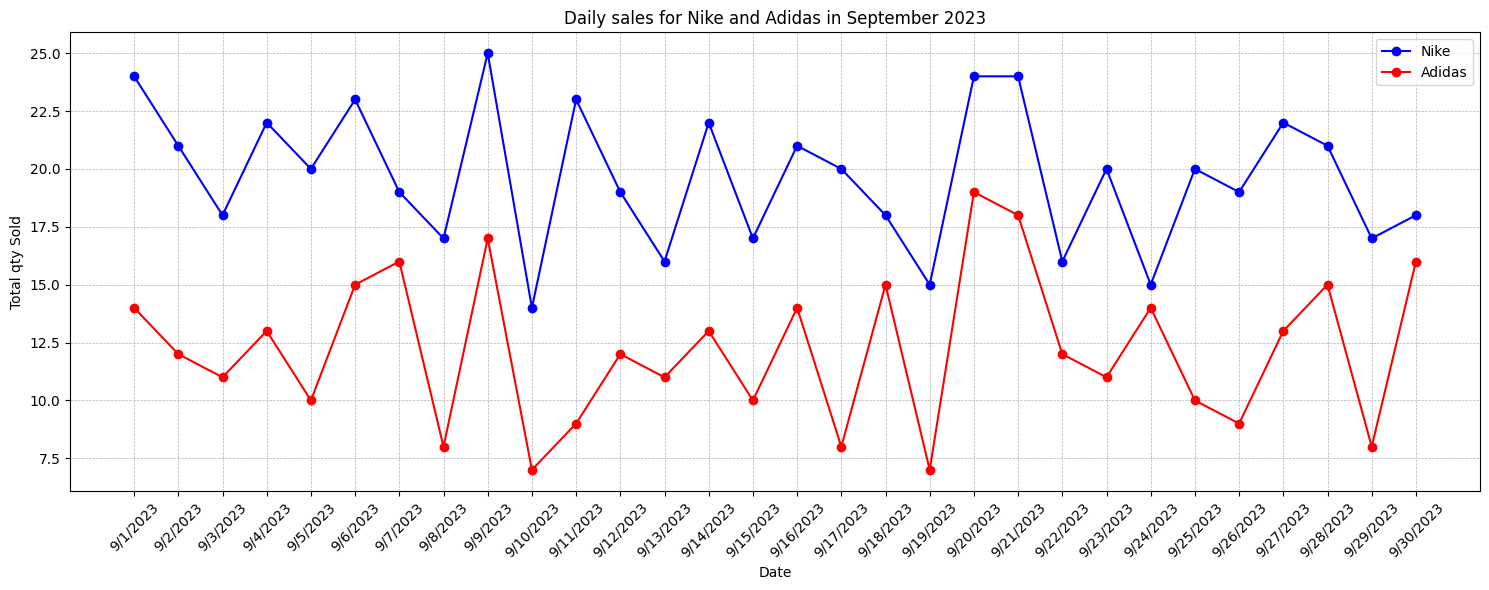

In [58]:
plot_qty()

### conclusion: Nike sales are higher